# ShallowMind 
## An exploratory endeavor into AI Chess

There is some overlap between this notebook and DataCreator_SM_Cloud

It was essential for the project deadline to simultaneously work on data creation / modeling, and fabricating functions.


#### Download libraries that could aid the process

In [1]:
#!pip install python-chess
#!pip install pgnparser
#!pip install pgnlib
#!pip install ipython-autotime ### time is becoming an issue...
#!pip install pystockfish
#!pip install stockfish

#### Import libraries for EDA, and processing

In [5]:
import chess
from chess import *
import pgn
from pystockfish import *

from stockfish import Stockfish

import pandas as pd
import numpy as np

import itertools

from sm_functions import *

### Useful sources of Chess game data - 
Chess GrandMaster games: https://chess-db.com/public/downloads/gamesfordownload.jsp - 275,606 games


#### Note parsing pgn file data returns only the first game in the file, limited documentation availble for further exploration. 
#### More processing required to access game lines and results.

In [2]:
import chess.pgn
pgn_file = open("pgnprepro.pgn")
first_game = chess.pgn.read_game(pgn_file)

print(f"{first_game.mainline_moves()}") #fancy built in method for accessing the moves


1. d4 e6 2. c4 d5 3. Nf3 Nf6 4. Nc3 Bb4 5. Bg5 h6 6. Bxf6 Qxf6 7. e3 O-O 8. Rc1 dxc4 9. Bxc4 c5 10. O-O cxd4 11. Ne4 Qe7 12. exd4 Nc6 13. Qe2 Bd7 14. a3 Bd6 15. Rfd1 Rad8 16. Qe3 Rfe8 17. b4 a6 18. Be2 Nb8 19. Ne5 Ba4 20. Rd2 Bxe5 21. dxe5 Rxd2 22. Qxd2 Rd8 23. Qb2 Bc6 24. Nd6 Bd5 25. f4 Nc6 26. a4 Qc7 27. b5 Qb6+ 28. Kf1 axb5 29. axb5 Ne7 30. Qc3 Rf8 31. Qc5 Qa5 32. Rd1 Qa2 33. g3 f6 34. exf6 Rxf6 35. Qc3 Qa7 36. Ne8 Rf7 37. Bh5 g6 38. Nf6+ Rxf6 39. Qxf6 gxh5 40. Qxe7 Bc4+ 41. Kg2 Bd5+ 42. Kh3 Qa2 43. Rxd5 Qxd5 44. Kh4 Qxb5 45. Qxe6+ Kg7 46. f5 Qc6 47. Qe7+ Kg8 48. Kxh5 b5 49. g4 b4 50. Qxb4 Qc7 51. Qb3+ Kh8 52. Qe6 Qf7+ 53. Qg6 Qc7 54. Qxh6+ Kg8 55. Qe6+ Kh8 56. Qe8+ Kh7 57. h4 Qb7 58. Qg6+ Kh8 59. Qh6+ Kg8 60. Qe6+ Kh8 61. g5 Qf7+ 62. g6 Qf8 63. g7+


#### Work-around for accesing moves and results
Note that due to future computational restrictions, I have to limit the number of games to a fraction of the original amount

In [3]:
game_list = [line for line in open('GMallboth.pgn')] 

all_moves_list = []
i = 11
while i <= (len(game_list)/300):           ###### NOTE: '/300' only using .3333% of the data availible from grandmasters
    all_moves_list.append(game_list[i])
    i += 16
    
    
all_results = []
i = 13
while i <= (len(game_list)/300):
    all_results.append(game_list[i])
    i += 16
    
all_openings = []
i = 6
while i <= (len(game_list)/300):
    all_openings.append(game_list[i])
    i += 16

In [4]:
(all_moves_list[0]), (all_results[0]), (all_openings[0])

('1. d4 e6 2. c4 d5 3. Nf3 Nf6 4. Nc3 Bb4 5. Bg5 h6 6. Bxf6 Qxf6 7. e3 O-O 8. Rc1 dxc4 9. Bxc4 c5 10. O-O cxd4 11. Ne4 Qe7 12. exd4 Nc6 13. Qe2 Bd7 14. a3 Bd6 15. Rfd1 Rad8 16. Qe3 Rfe8 17. b4 a6 18. Be2 Nb8 19. Ne5 Ba4 20. Rd2 Bxe5 21. dxe5 Rxd2 22. Qxd2 Rd8 23. Qb2 Bc6 24. Nd6 Bd5 25. f4 Nc6 26. a4 Qc7 27. b5 Qb6+ 28. Kf1 axb5 29. axb5 Ne7 30. Qc3 Rf8 31. Qc5 Qa5 32. Rd1 Qa2 33. g3 f6 34. exf6 Rxf6 35. Qc3 Qa7 36. Ne8 Rf7 37. Bh5 g6 38. Nf6+ Rxf6 39. Qxf6 gxh5 40. Qxe7 Bc4+ 41. Kg2 Bd5+ 42. Kh3 Qa2 43. Rxd5 Qxd5 44. Kh4 Qxb5 45. Qxe6+ Kg7 46. f5 Qc6 47. Qe7+ Kg8 48. Kxh5 b5 49. g4 b4 50. Qxb4 Qc7 51. Qb3+ Kh8 52. Qe6 Qf7+ 53. Qg6 Qc7 54. Qxh6+ Kg8 55. Qe6+ Kh8 56. Qe8+ Kh7 57. h4 Qb7 58. Qg6+ Kh8 59. Qh6+ Kg8 60. Qe6+ Kh8 61. g5 Qf7+ 62. g6 Qf8 63. g7+ \n',
 '1-0\n',
 '[ECO "A40"]\n')

When processing the commented out game below. There is an en passante move that doesnt correspond with a legal move and throws an error while processing board states. Although this is an isolated occurance, it should be looked into, in order to capture an advantageous board state.

In [5]:
#ep_game = ['1. d4 e6 2. c4 d5 3. Nf3 Nf6 4. Nc3 Bb4 5. Bg5 h6 6. Bxf6 Qxf6 7. e3 O-O 8. Rc1 dxc4 9. Bxc4 c5 10. O-O cxd4 11. Ne4 Qe7 12. exd4 Nc6 13. Qe2 Bd7 14. a3 Bd6 15. Rfd1 Rad8 16. Qe3 Rfe8 17. b4 a6 18. Be2 Nb8 19. Ne5 Ba4 20. Rd2 Bxe5 21. dxe5 Rxd2 22. Qxd2 Rd8 23. Qb2 Bc6 24. Nd6 Bd5 25. f4 Nc6 26. a4 Qc7 27. b5 Qb6+ 28. Kf1 axb5 29. axb5 Ne7 30. Qc3 Rf8 31. Qc5 Qa5 32. Rd1 Qa2 33. g3 f6 34. exf6 Rxf6 35. Qc3 Qa7 36. Ne8 Rf7 37. Bh5 g6 38. Nf6+ Rxf6 39. Qxf6 gxh5 40. Qxe7 Bc4+ 41. Kg2 Bd5+ 42. Kh3 Qa2 43. Rxd5 Qxd5 44. Kh4 Qxb5 45. Qxe6+ Kg7 46. f5 Qc6 47. Qe7+ Kg8 48. Kxh5 b5 49. g4 b4 50. Qxb4 Qc7 51. Qb3+ Kh8 52. Qe6 Qf7+ 53. Qg6 Qc7 54. Qxh6+ Kg8 55. Qe6+ Kh8 56. Qe8+ Kh7 57. h4 Qb7 58. Qg6+ Kh8 59. Qh6+ Kg8 60. Qe6+ Kh8 61. g5 Qf7+ 62. g6 Qf8 63. g7+ ', '1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. Nc3 e5 6. Ndb5 d6 7. Bg5 a6 8. Na3 b5 9. Bxf6 gxf6 10. Nd5 f5 11. c3 Bg7 12. Bd3 Be6 13. Qh5 O-O 14. O-O f4 15. g4 Rb8 16. Nc2 Qd7 17. f3 a5 18. Na3 b4 19. Nb5 bxc3 20. bxc3 Ne7 21. a4 Rfc8 22. Rad1 Rc5 23. c4 Re8 24. Kh1 Ng6 25. Rfe1 Rb8 26. Bf1 Bxd5 27. exd5 Qe7 28. g5 Rbc8 29. Re4 f5 30. gxf6ep Qxf6 31. Bh3 Rd8 32. Be6+ Kh8 33. Bf5 Nf8 34. Rg1 Qh6 35. Qxh6 Bxh6 36. Re2 Rxc4 37. Reg2 Ng6 38. Bxg6 hxg6 39. Rxg6 Bf8 40. R6g5 Kh7 41. Rh5+ Bh6 42. Rg4 Rc5 43. Kg2 Rxd5 44. Nc3 Rd2+ 45. Kh3 d5 46. Rxe5 Rd3 47. Re7+ Kh8 48. Re6 Bg7 49. Ne2 Rxf3+ 50. Kg2 Re3 51. Nxf4 d4 52. Rxg7 Rxe6 53. Nxe6 Rd6 54. Rg6 d3 55. Nf4 Rd4 56. Nxd3 Rxd3 57. Rg5 Rd2+ 58. Kg3 Rd3+ 59. Kh4 Rd4+ 60. Rg4 Rb4 61. Kg5 Rb2 62. h4 Kg7 63. Kh5+ Kf6 64. Rg5 Rb8 65. Rxa5 Rh8+ 66. Kg4 Rc8 67. Rf5+ Kg6 68. a5 Rc1 69. h5+ Kg7 70. Kf4 Ra1 71. Rb5 Kh6 72. Ke4 Rd1 73. a6 Ra1 74. Rb6+ Kxh5 75. Kd5 Rc1 76. Rc6 Ra1 77. Kc5 Kg4 78. Kb6 Rb1+ 79. Kc7 Kf5 80. a7 Rb4 81. Re6 Rb1 82. Re2 Kg6'] 


#### Creating a results list from White's perspective

In [6]:
%%time
white_test = white_results(all_results)
white_test[:5]

CPU times: user 1.14 ms, sys: 100 µs, total: 1.24 ms
Wall time: 1.25 ms


['win', 'lose', 'draw', 'win', 'draw']

## Converts string of all the game moves into lists of moves in standard algebraic notation (san) 
### Just to ease into the process....
 - The list of moves below will be fed into the stockfish engine to evaluate a positional score regarding how good or bad the players are doing
     - The example below is refrencing the first game and the first 10 moves of the game
 - These moves get transformed into an array of 64 positions with the piecies that occupy the spaces
 - Then further decomposition will isolate each type of pice and map it on its own array of 64 positions 
 - Thus the final data shape will be 6 arrays each containing 64 positional features
 
### If this didn't much sense, please continue and hopefully the additional commentary will be useful.

In [7]:
%%time
all_san_list = [get_move_list(game) for game in all_moves_list]
all_san_list[0][0:10]

CPU times: user 269 ms, sys: 20.5 ms, total: 290 ms
Wall time: 315 ms


['d4', 'e6', 'c4', 'd5', 'Nf3', 'Nf6', 'Nc3', 'Bb4', 'Bg5', 'h6']

#### Move games from results pool to sub-pool (win, lose, or draw)
 - Current methodology doesn't require the seperation of 'winning', 'losing', and 'draw' outcomes
 - This section relies predominantly on the before-and-after board states, but doesnt quantify the advantage gained. 
 - The move played and the resulting board state was the best since it led to a win.


In [8]:
white_win = []
white_lose = []
white_draw = []

for i in range(len(white_test)):
    if white_test[i] == 'win':
        white_win.append(all_san_list[i])
    elif white_test[i] == 'lose':
        white_lose.append(all_san_list[i])
    else:
        white_draw.append(all_san_list[i])
print(len(white_win), len(white_lose), len(white_draw))

304 185 429


In [9]:
%%time
white_win_bs = []
for i in range(len(white_win)):
    white_win_bs.extend(get_white_win_bs(white_win[i]))

CPU times: user 10 s, sys: 119 ms, total: 10.1 s
Wall time: 10.4 s


In [10]:
%%time
white_lose_bs = []
for i in range(len(white_lose)):
    white_lose_bs.extend(get_white_lose_bs(white_lose[i]))

CPU times: user 6.69 s, sys: 115 ms, total: 6.8 s
Wall time: 7.36 s


In [12]:
winning_position = white_lose_bs + white_win_bs

### En Passante cleaner
In progress... hoping to scrape the en passante games that dont register as a legal move an coerce that FEN and remaining FEN board state in the game.

In [13]:
'''
BS = []
x = [get_move_list(game) for game in ep_game]

for y in x:
    z = get_board_state_array(y)
    if z[-1] != 0:
        BS.append(z)
BS
'''

'\nBS = []\nx = [get_move_list(game) for game in ep_game]\n\nfor y in x:\n    z = get_board_state_array(y)\n    if z[-1] != 0:\n        BS.append(z)\nBS\n'

## Testing Ground for Python Chess

#### Knowing how/why certain methods weren't working, was an ongoing challenge that this practice helped reveal solutions

#### Using built in pgn methods
Seems like a very usable format, but I have multiple games inside of one pgn file and can't iterate through them. 

In [14]:

import chess.pgn
pgn_file = open("GMallboth.pgn")
first_game = chess.pgn.read_game(pgn_file)

node = first_game
[m for m in node.mainline_moves()][0:5]


[Move.from_uci('d2d4'),
 Move.from_uci('e7e6'),
 Move.from_uci('c2c4'),
 Move.from_uci('d7d5'),
 Move.from_uci('g1f3')]

#### Making a blank board for the game to be played on

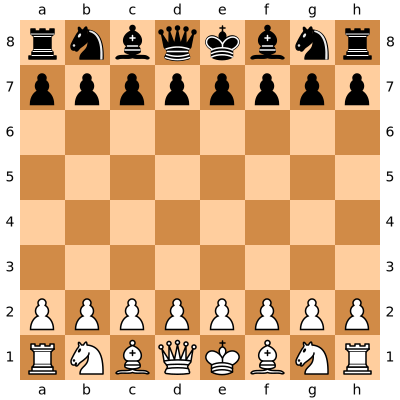

In [15]:
GM_board = chess.Board() 
GM_board

#### This works, but there is a method that uses uci notation, and I won't have to convert it to san 

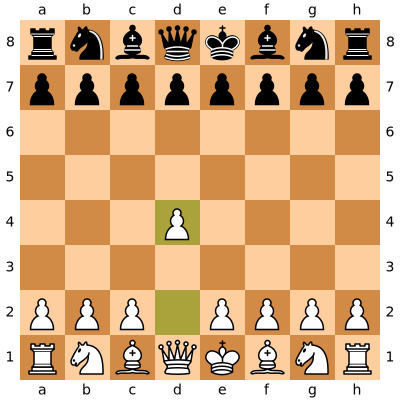

In [16]:
next_node = node.variation(0)
GM_move = str(node.board().san(next_node.move))  #### Messy, converting uci to san in order to push the piece
GM_board.push_san(GM_move)
GM_board

#### Starting board again

In [17]:
board = chess.Board()

#### This is how the command is pushed to board object, in uci format 'd2d4' (d2 to d4)

In [18]:
board.push_san('d4')

Move.from_uci('d2d4')

#### New board is created!

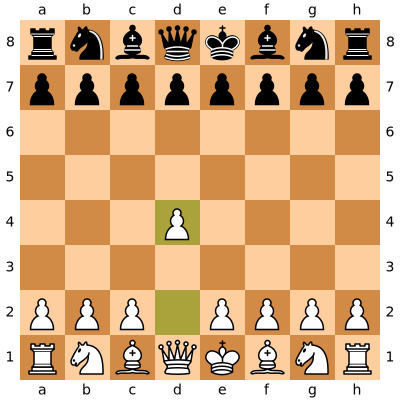

In [19]:
board

#### Getting board states - in Forsyth-Edwards Notation AKA FEN  
Why do we want FEN? 

FEN can be converted to 64 position arrays that correspond to each piece and where they are

In [20]:
board.board_fen()

'rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR'

#### You can set the board however you like in fen notation

In [33]:
board_fen = 'rnbQkbnr/ppppp1pp/5p2/8/3P4/p7/PPP1PPPP/RNBqKBNR'

In [34]:
board.set_board_fen(board_fen)

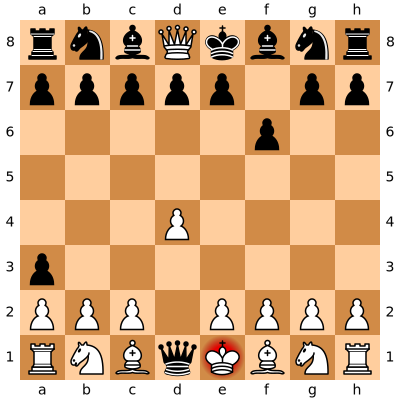

In [35]:
board

#### Below is an extremly handy method that will limit restrict the AI's calculation of moves
In the board above the black king only has 2 legal moves: capture the queen thats putting him in check, or moving behind his pawn on the f-column

In [24]:
list(board.generate_legal_moves())

[Move.from_uci('e8d8'), Move.from_uci('e8f7')]

# Testing StockFish
 - StockFish is a highly competitive chess engine that relies on evaluating postions
 - StockFish makes these positional evaluations based on Alpha-Beta Tree searches
     - Pro:
         - Very accurate position evaluation
         - Looks ahead n-number of moves 
     - Cons:
         - Computation is insanely intensive even with Alpha-Beta reduction
             - [Shannons Number](https://en.wikipedia.org/wiki/Shannon_number)
 - Goal:
     - **ShallowMind making similar predictions in less time**

In [25]:
from stockfish import Stockfish
#pip install stockfish

In [26]:
from stockfish import Stockfish



In [2]:
%%time
stockfish = "stockfish-11-mac/Mac/stockfish-11-64"
import chess
import chess.engine
engine = chess.engine.SimpleEngine.popen_uci(stockfish)
for i in range(10,30):   
    board = chess.Board()
    info = engine.analyse(board, chess.engine.Limit(depth=i))
    print("Score:", info["score"], "- depth:", info['depth'], "- nodes:", info['nodes'])
engine.quit()

Score: +105 - depth: 10 - nodes: 18613
Score: +86 - depth: 11 - nodes: 44295
Score: +75 - depth: 12 - nodes: 70847
Score: +105 - depth: 13 - nodes: 136018
Score: +95 - depth: 14 - nodes: 180218
Score: +91 - depth: 15 - nodes: 442546
Score: +81 - depth: 16 - nodes: 424512
Score: +76 - depth: 17 - nodes: 544001
Score: +65 - depth: 18 - nodes: 485678
Score: +69 - depth: 19 - nodes: 1523123
Score: +51 - depth: 20 - nodes: 1158847
Score: +58 - depth: 21 - nodes: 2947202
Score: +56 - depth: 22 - nodes: 1794606
Score: +41 - depth: 23 - nodes: 4103063
Score: +52 - depth: 24 - nodes: 8408456
Score: +74 - depth: 25 - nodes: 9203309
Score: +63 - depth: 26 - nodes: 11711820
Score: +63 - depth: 27 - nodes: 8247345
Score: +75 - depth: 28 - nodes: 24285469
Score: +61 - depth: 29 - nodes: 25453324
CPU times: user 396 ms, sys: 30.5 ms, total: 426 ms
Wall time: 1min 21s


### Now I can combine my features with my target, and create a model that will predict the score without the depth/time restriction of StockFish

In [193]:
# | Features      |   Target                |
# |_______________|_________________________|
# |Bitwise 64*6   |  Positional value (cps) |
# |_______________|_________________________|

# **GO TO: DataCreator_SM_Cloud.ipynb**
At this point, I needed a better machine to create my data and model.

# **Playing game**


In [194]:
import pandas as pd
import numpy as np
import chess
import pickle

import itertools
import os

import keras
from matplotlib import pyplot as plt
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers.core import Activation
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
import xgboost
import sklearn.model_selection
from sklearn.preprocessing import MinMaxScaler 

In [195]:
model = keras.models.load_model('model2.h5')

In [ ]:
## with open('bitwise_data.p', 'rb') as read_file:
 #   data = pickle.load(read_file)

In [ ]:
#df = pd.DataFrame(data, columns = ['cp', 'bitwise'])

### Starting board

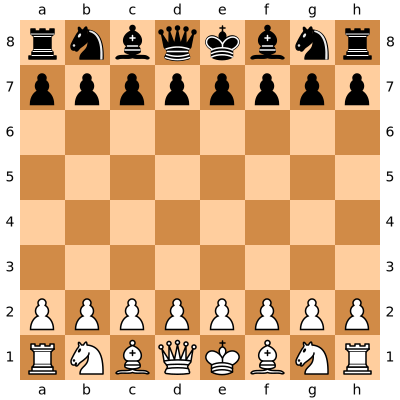

In [3]:
board = chess.Board()
turn = 0
board

### Rerun the below cell to play out the game

In [4]:
turn += 1
x = run_AI(board, turn)
print(x, 'turn-',turn)

move = x[0]

board.push(chess.Move.from_uci(move))

board

NameError: name 'run_AI' is not defined

#### Another implementation on a simplified board, white captures and black doesn't have any more leagal moves so an error pops up

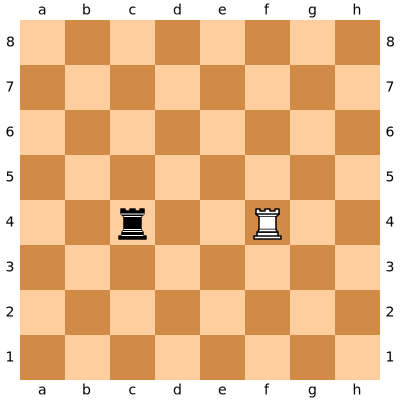

In [288]:
funny_board = chess.Board('8/8/8/8/2r2R2/8/8/8')
funny_board

('f4c4', 0.5156649351119995) turn- 1


/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


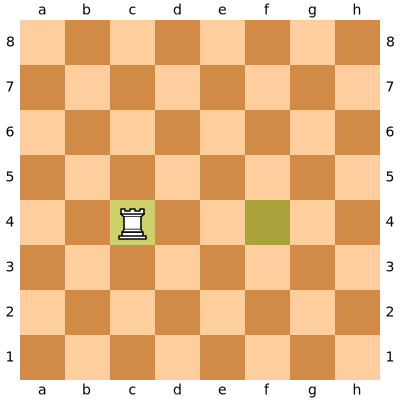

In [289]:
turn = 1
x = run_AI(funny_board, turn)
move = x[0]
print(x, 'turn-',turn)
funny_board.push(chess.Move.from_uci(move))
funny_board


